#**Data** **Preprocessing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import chi2_contingency

In [ ]:
#load the Data
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# Overview of the dataset
print("Data Overview : ")
print( df.info())
print("Data Types : \n" , df.dtypes)
print("Data Shape : \n", df.shape)
print("Data Head : \n", df.head())
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics (Numerical):\n", df.describe())
print("\nBasic Statistics (Categorical):\n", df.describe(include=['object']))

Data Overview : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 no

In [ ]:
# there is no missing values in the dataset .
# Most columns has appropriate data types, where "Totalcharges" is of type 'object' , which should be numeric .

#Converting "Totalcharges" to numeric , coerce to handle the non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# there are 11 missing values in the TotalCharges column after converting it to a numeric type.
# handling the missing values in TotalCharges,these could be filled with the median.

# Fill missing values in 'TotalCharges' with the median value
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
# Verify there are no more missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


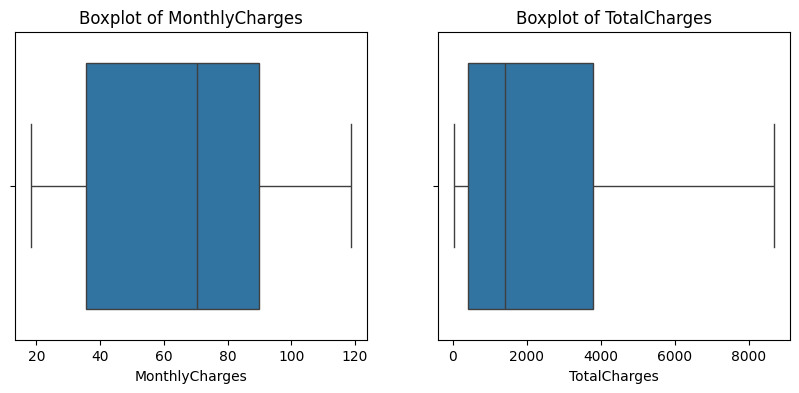

In [ ]:
# OUTLIERS

# identify outliers in the MonthlyCharges and TotalCharges columns using Boxplot and IQR method.

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot of MonthlyCharges')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['TotalCharges'])
plt.title('Boxplot of TotalCharges')

plt.show()

In [ ]:
# Clipping the Outliers :- set the outliers to a maximum or minimum threshold value based on IQR.

# Calculate the IQR for 'MonthlyCharges' and 'TotalCharges'
Q1_monthly = df['MonthlyCharges'].quantile(0.25)
Q3_monthly = df['MonthlyCharges'].quantile(0.75)
IQR_monthly = Q3_monthly - Q1_monthly

Q1_total = df['TotalCharges'].quantile(0.25)
Q3_total = df['TotalCharges'].quantile(0.75)
IQR_total = Q3_total - Q1_total

lower_bound_monthly = Q1_monthly - 1.5 * IQR_monthly
upper_bound_monthly = Q3_monthly + 1.5 * IQR_monthly

lower_bound_total = Q1_total - 1.5 * IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total

df['MonthlyCharges'] = np.clip(df['MonthlyCharges'], lower_bound_monthly, upper_bound_monthly)
df['TotalCharges'] = np.clip(df['TotalCharges'], lower_bound_total, upper_bound_total)

In [ ]:
# NORMALIZING THE DATA

# Selecting the columns to normalize
columns_to_normalize = ['MonthlyCharges', 'TotalCharges']

# Min-Max Normalization
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()
df_min_max_scaled[columns_to_normalize] = min_max_scaler.fit_transform(df[columns_to_normalize])


print("Min-Max Normalized Data:")
print(df_min_max_scaled.head())

#-----------------------------------------------------------------------------------------------------------#

# Z-Score Normalization (Standardization)
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[columns_to_normalize] = standard_scaler.fit_transform(df[columns_to_normalize])


print("\nZ-Score Normalized Data:")
print(df_standard_scaled.head())

Min-Max Normalized Data:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMo

# **Exploratory** **Analysis**

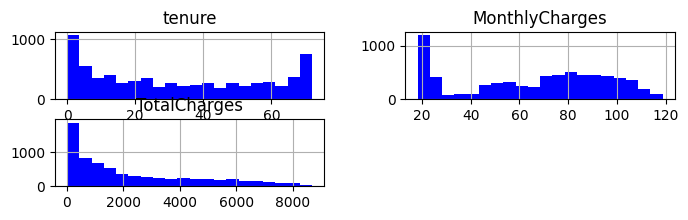

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


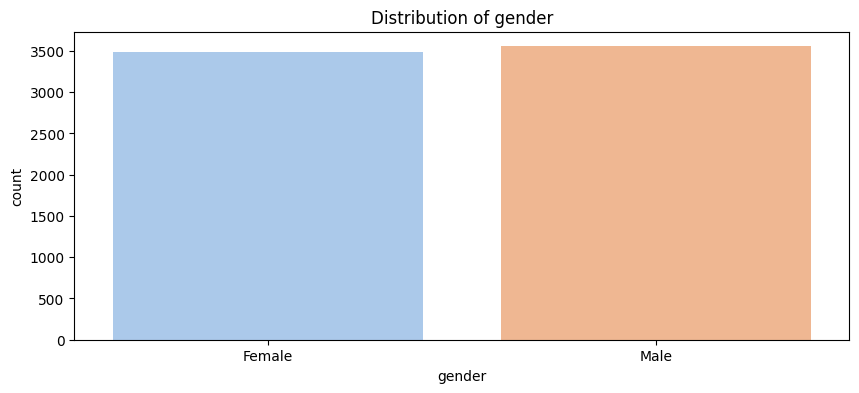

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


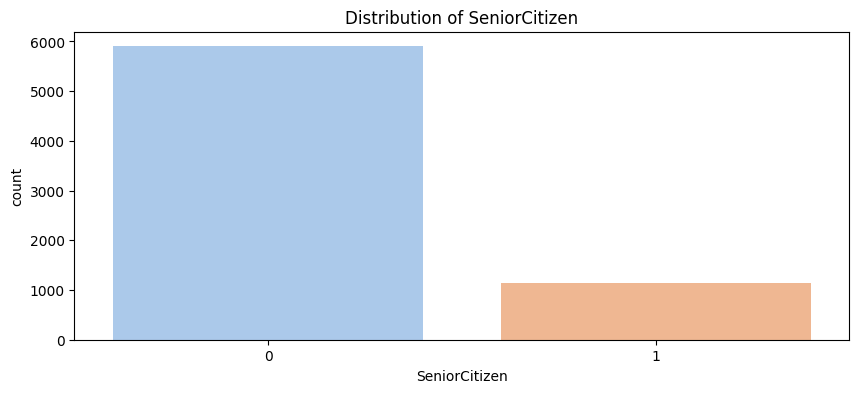

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


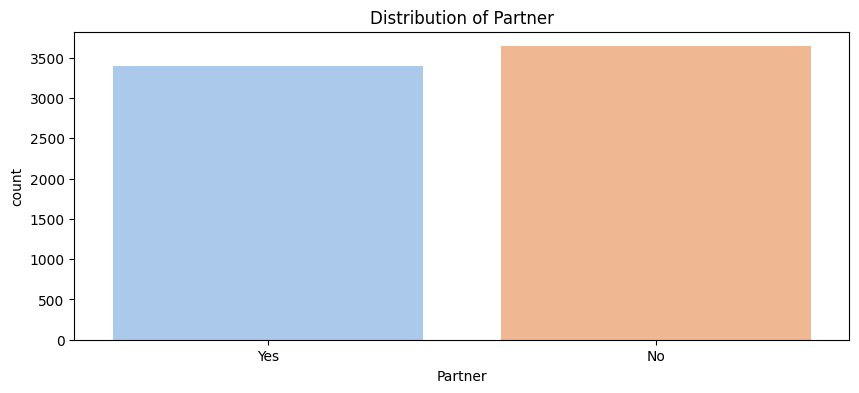

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


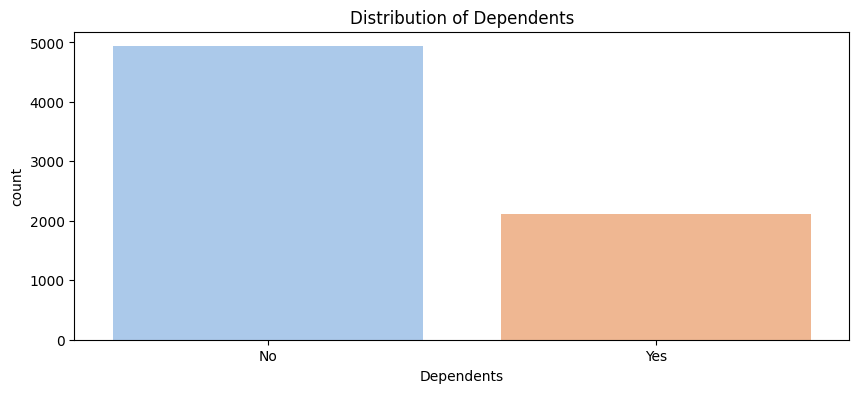

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


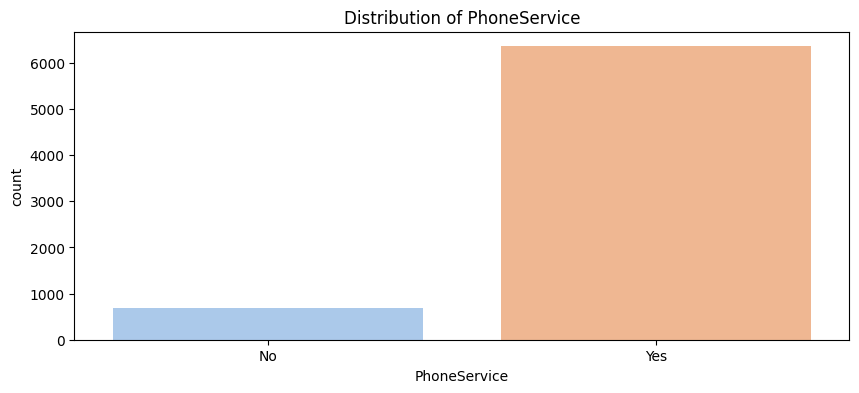

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


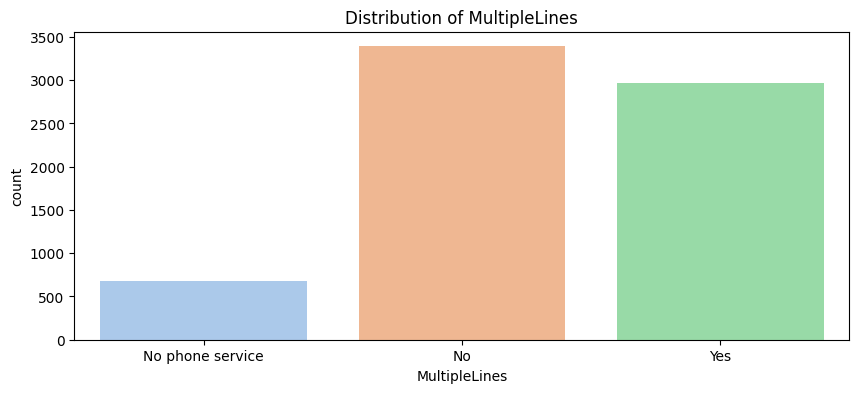

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


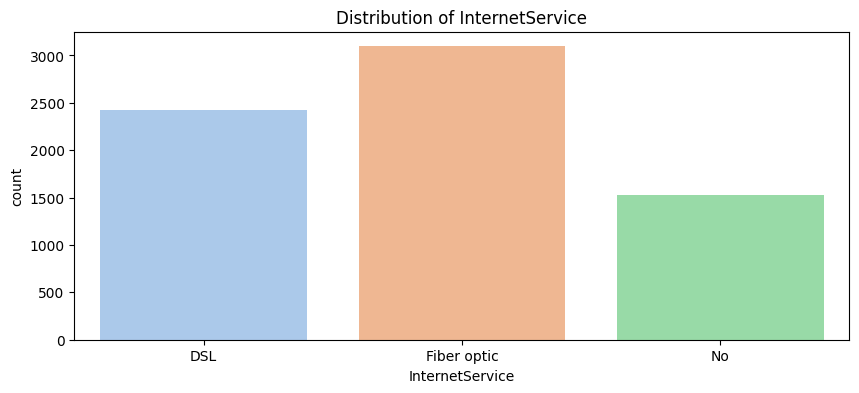

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


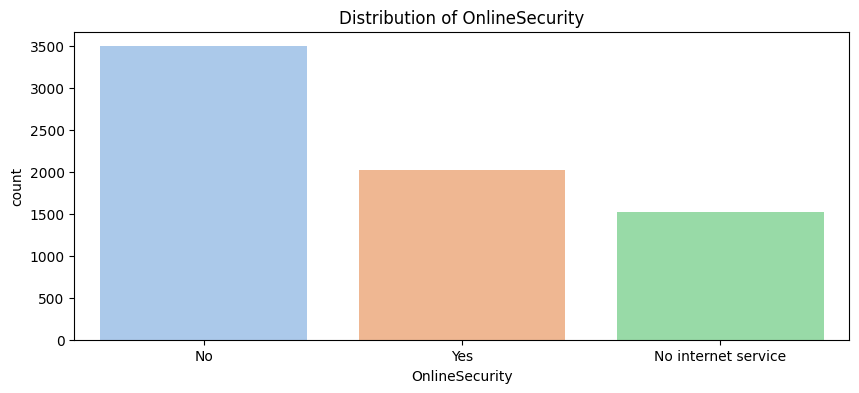

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


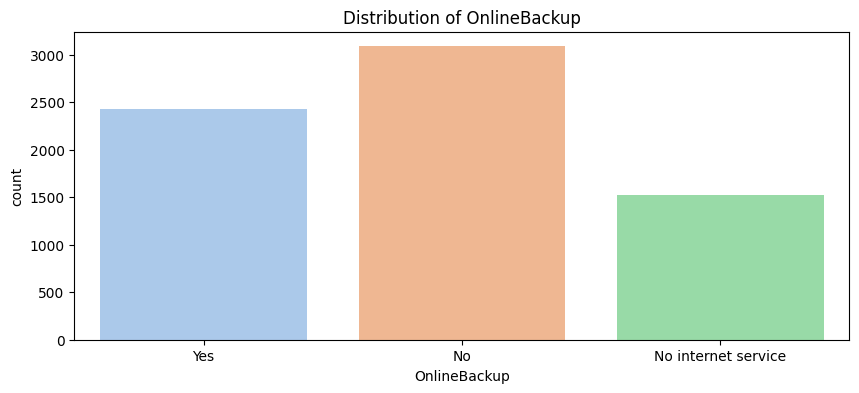

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


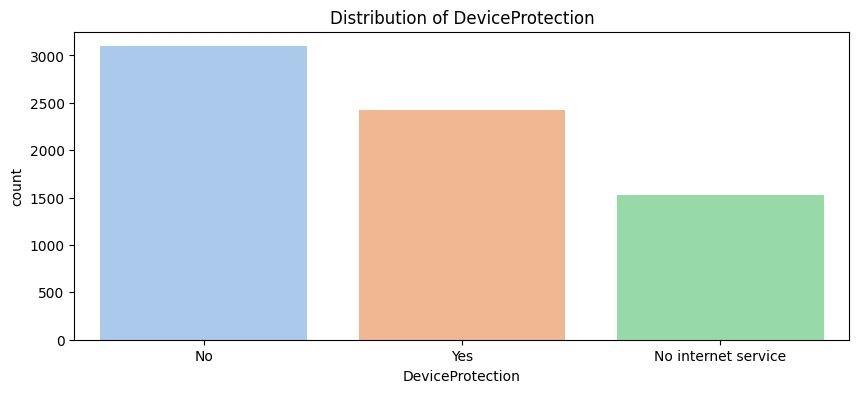

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


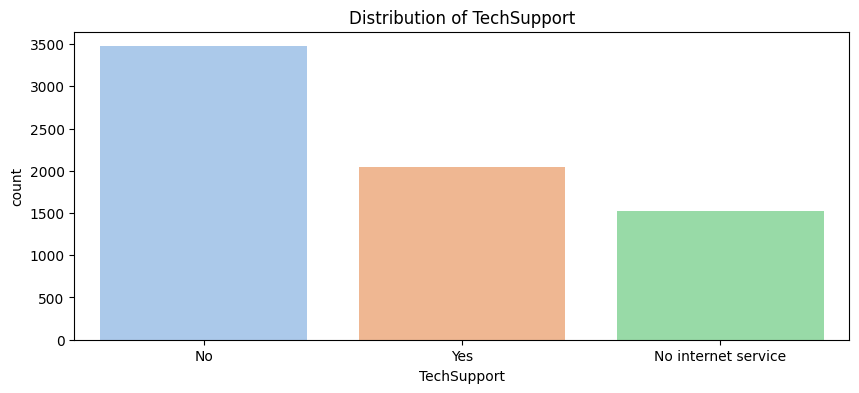

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


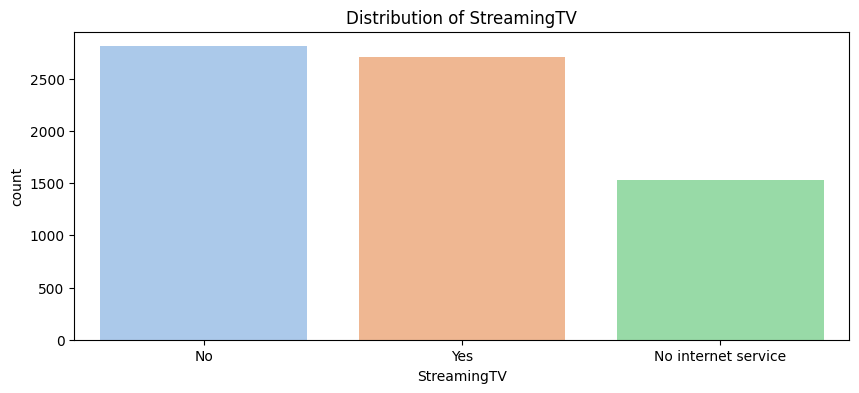

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


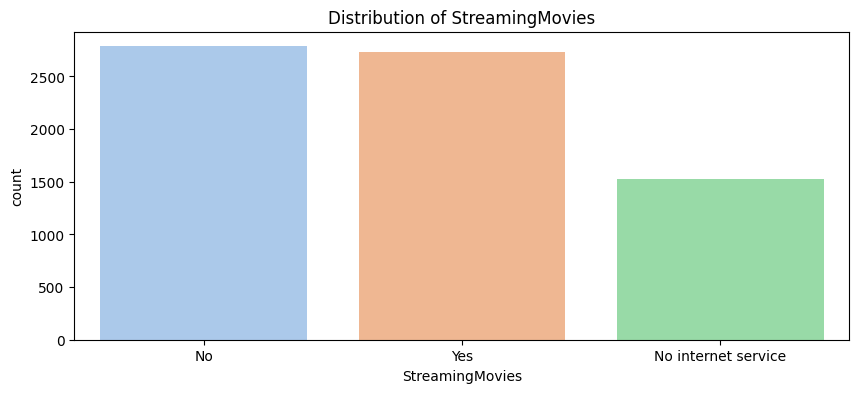

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


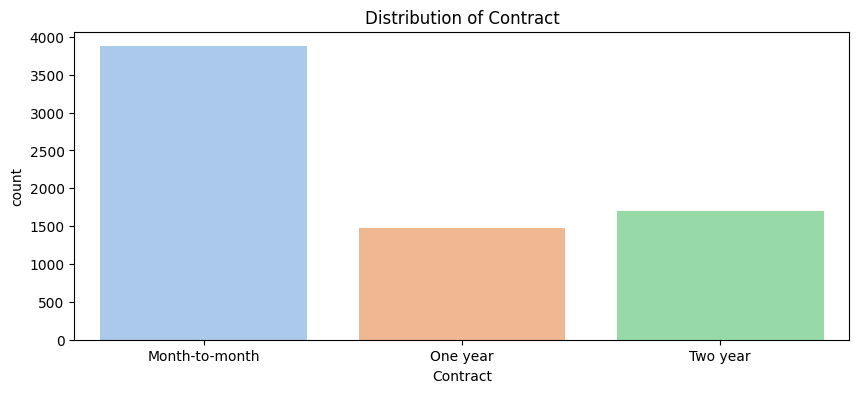

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


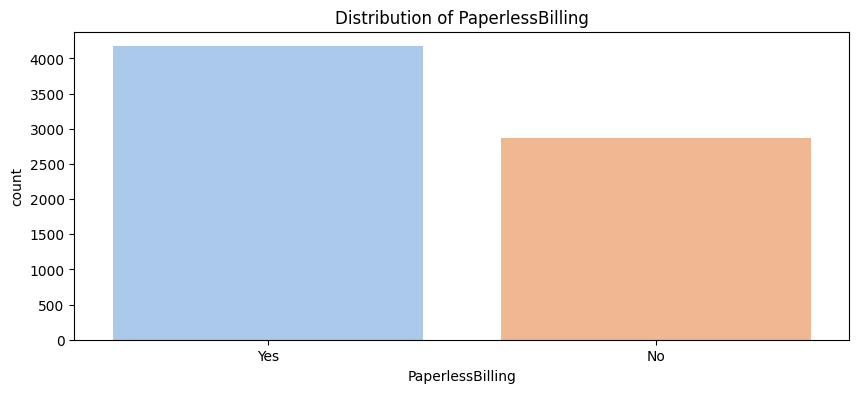

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


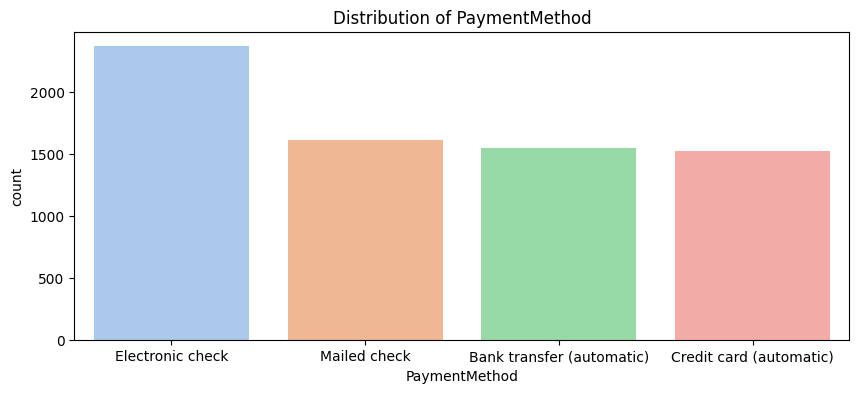

<ipython-input-39-f8726ad7a0d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='pastel')


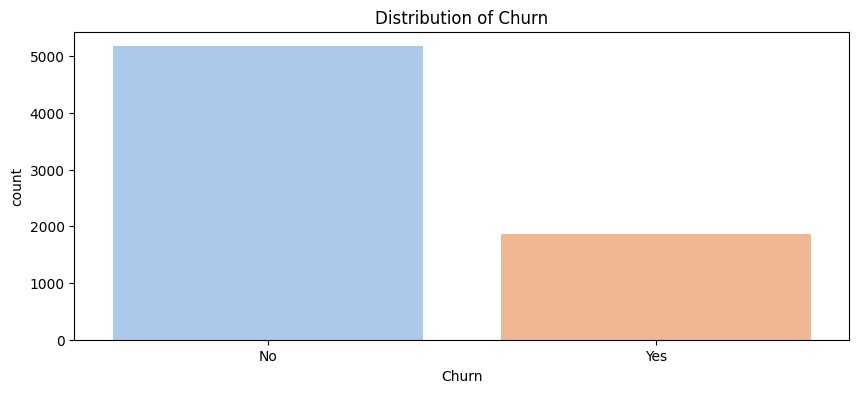

In [ ]:
#Univariate Analysis
#Examine the distribution of each variable, focusing on churn.

# Distribution of numerical variables
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=20, figsize=(8, 2), color='blue')
plt.show()

# Distribution of categorical variables
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=var, palette='pastel')
    plt.title(f'Distribution of {var}')
    plt.show()

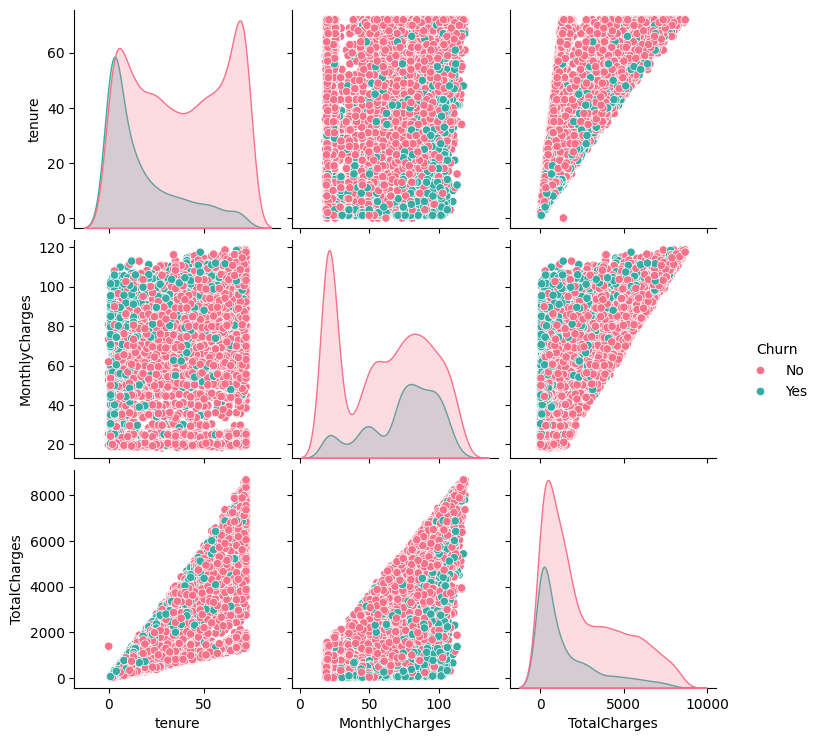

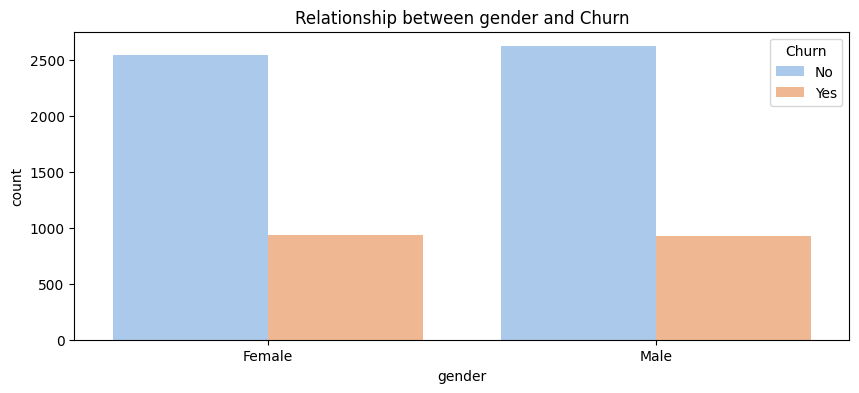

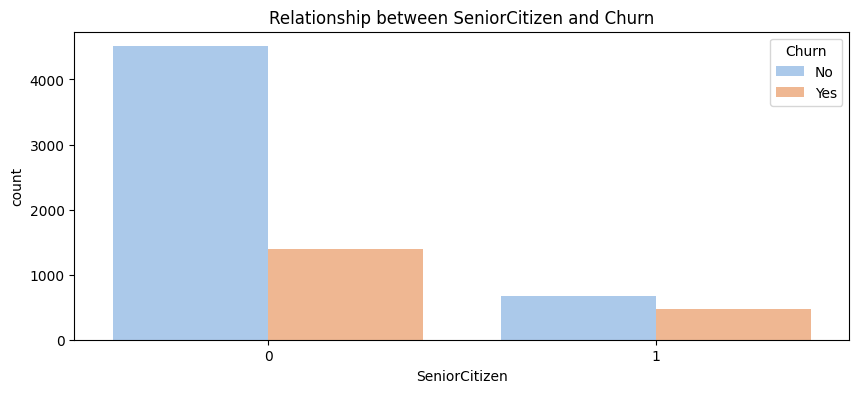

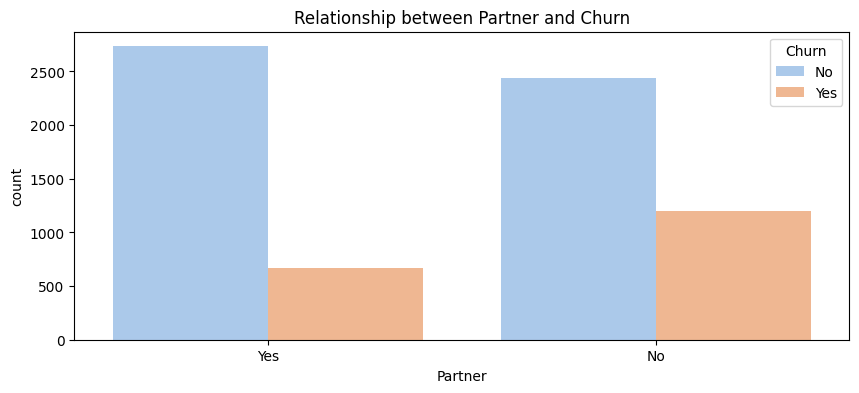

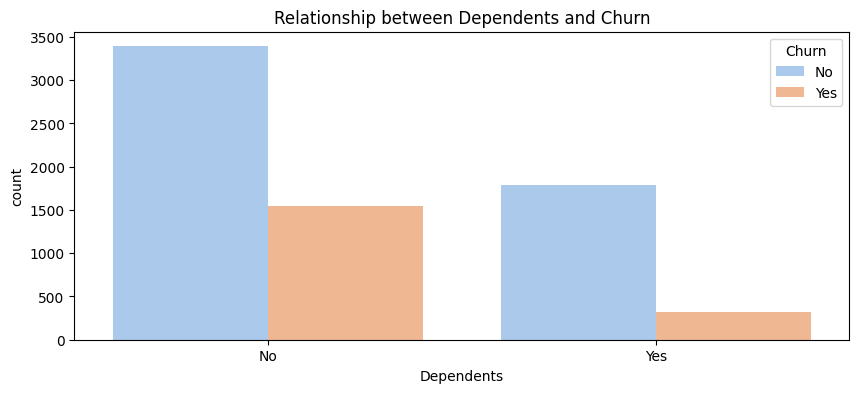

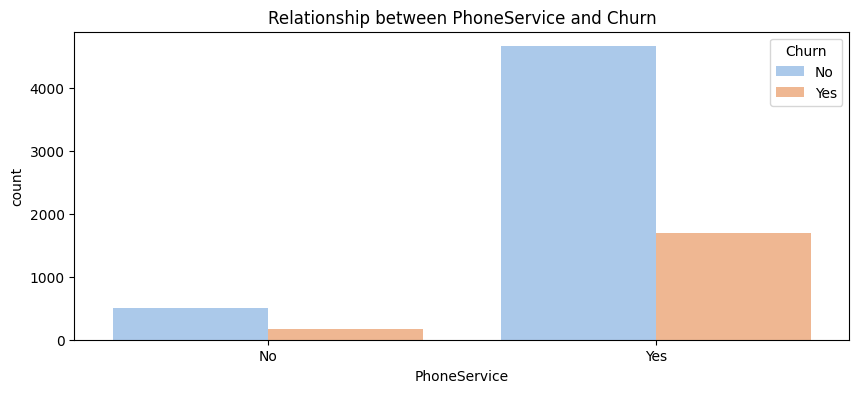

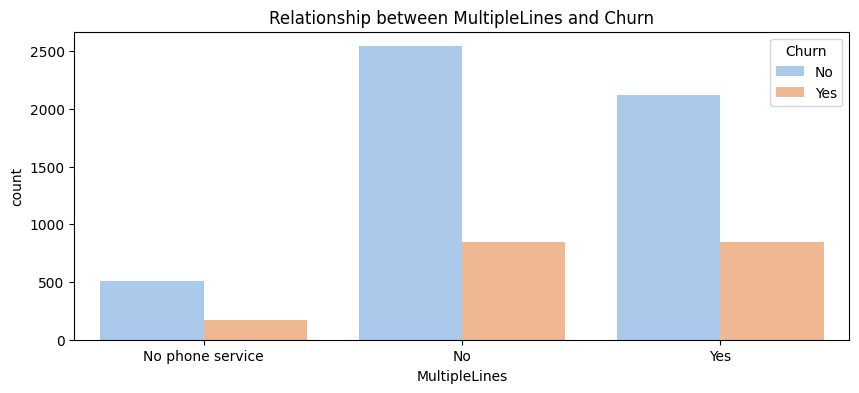

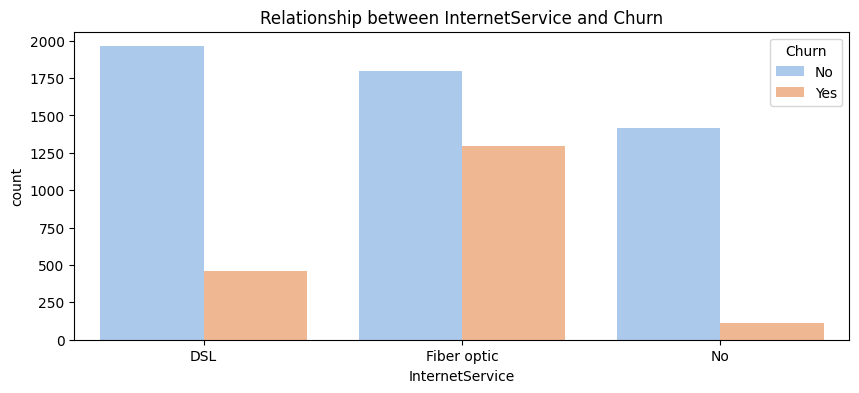

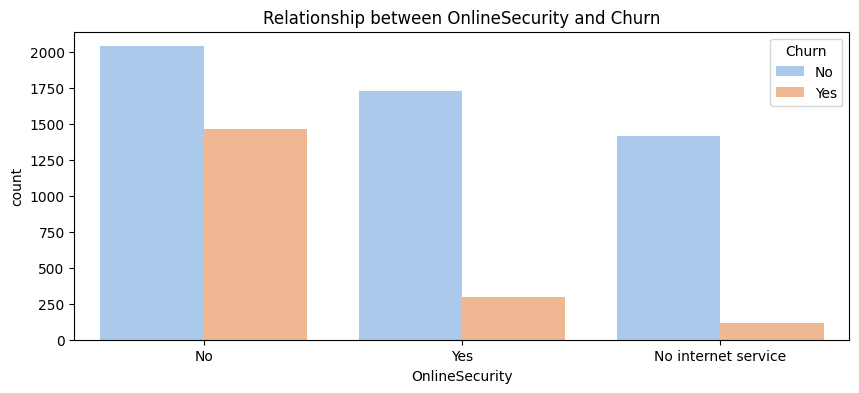

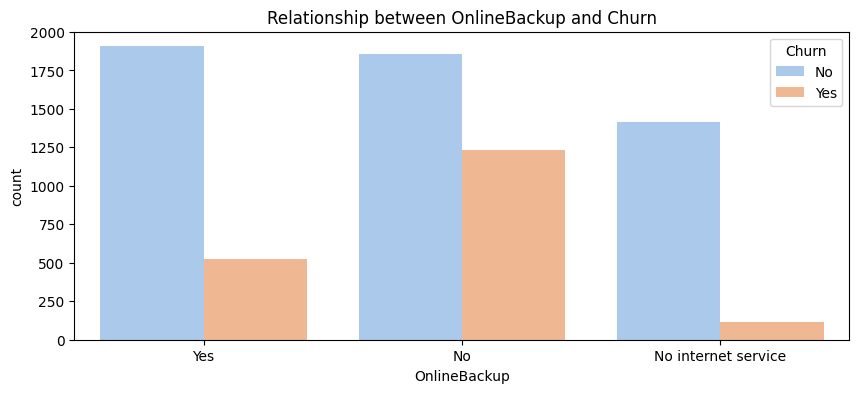

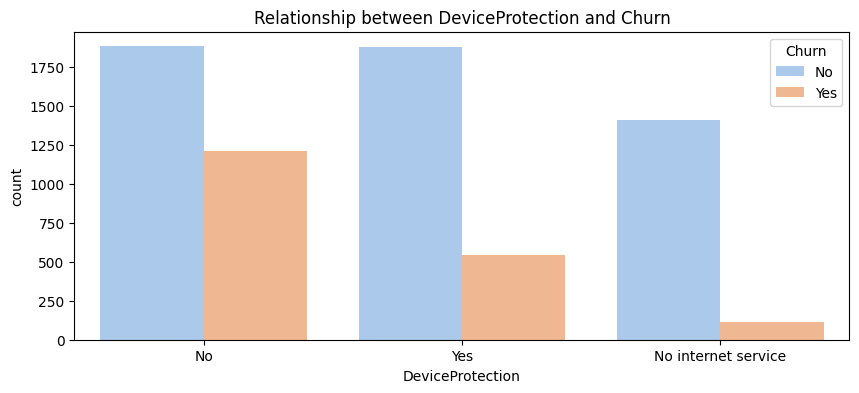

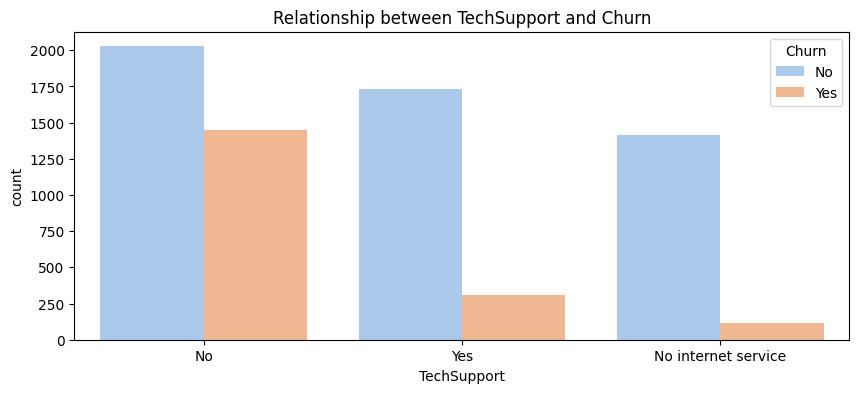

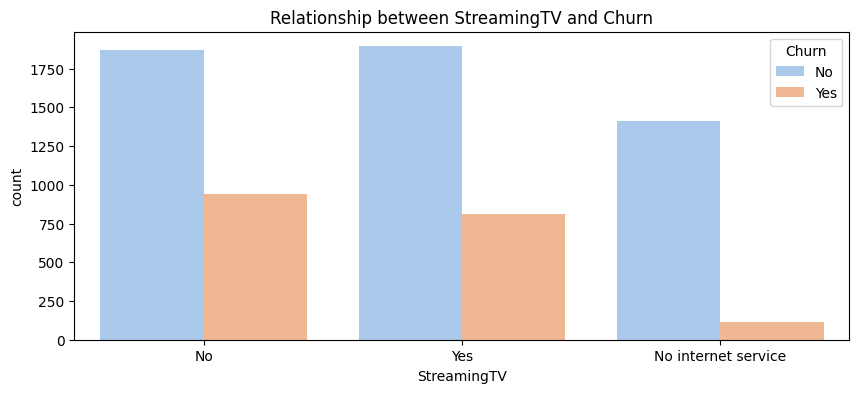

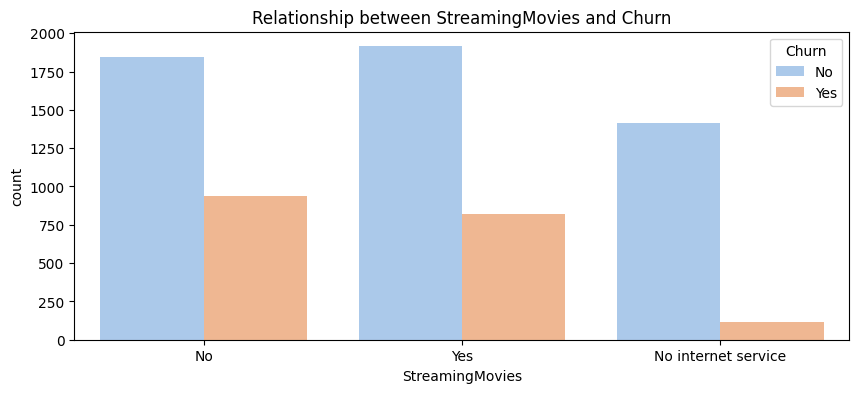

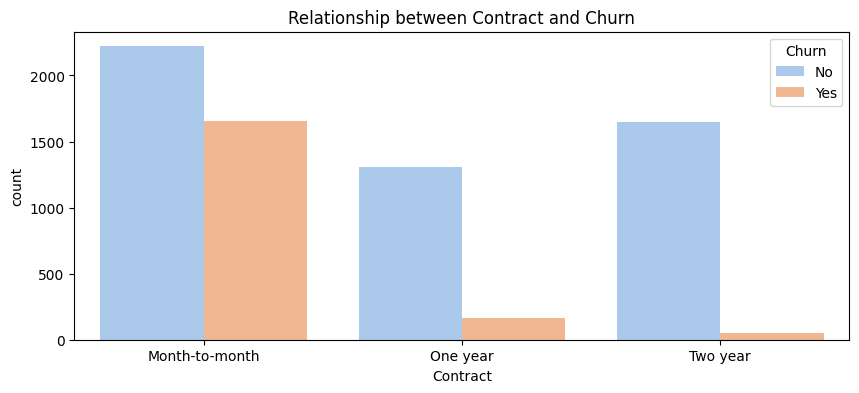

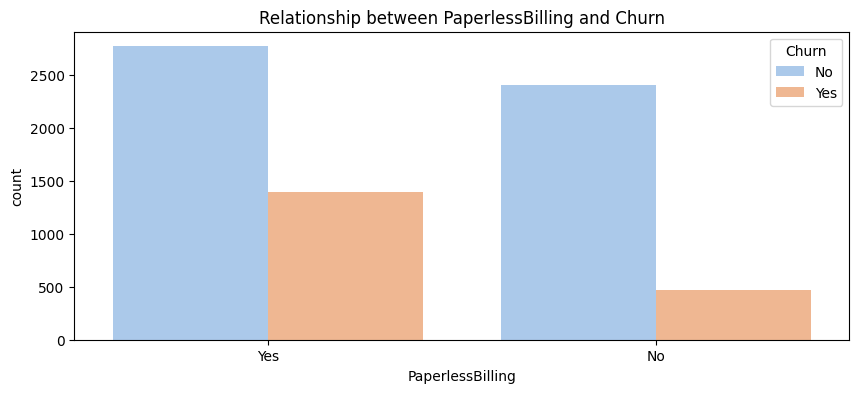

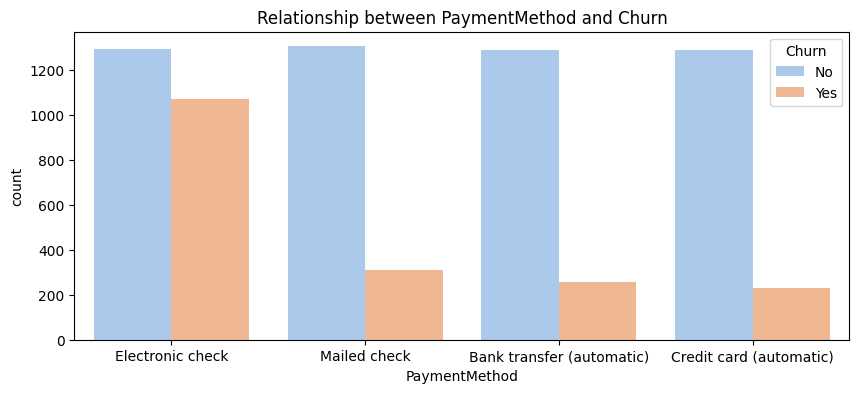

In [ ]:
#Bivariate Analysis
#Explore the relationship between each feature and the churn variable.

# Relationship between numerical variables and churn
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='husl')
plt.show()

# Relationship between categorical variables and churn
for var in categorical_vars[:-1]:  # Exclude 'Churn'
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=var, hue='Churn', palette='pastel')
    plt.title(f'Relationship between {var} and Churn')
    plt.show()

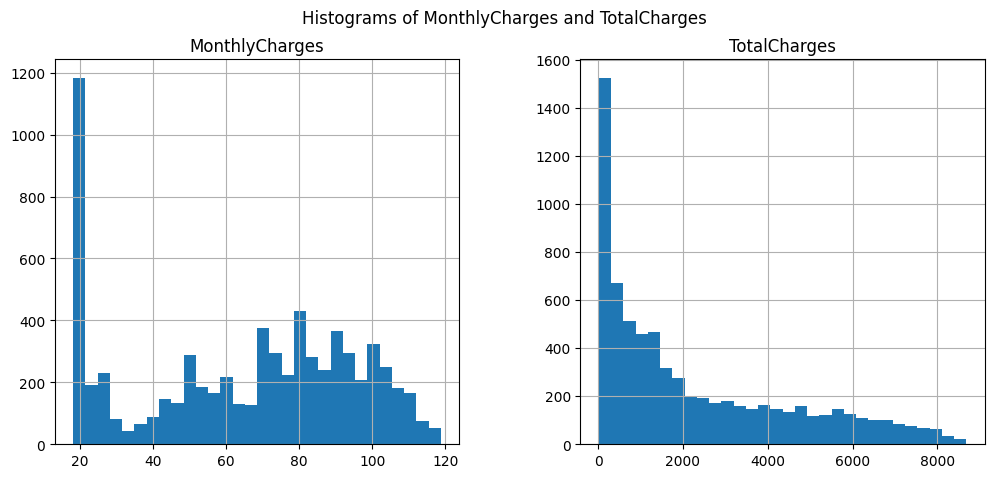

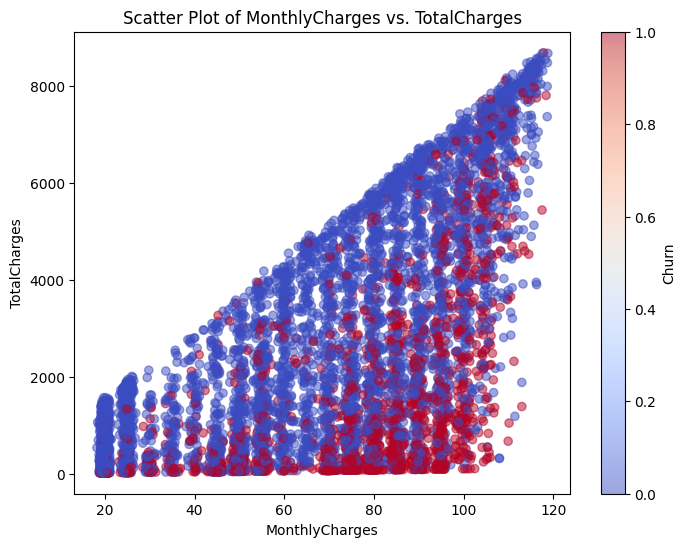

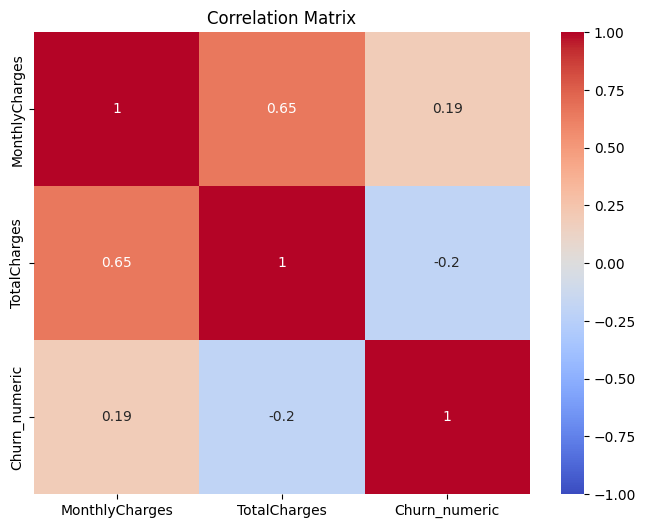

In [ ]:
#Visualization

# Histograms of MonthlyCharges and TotalCharges
df[['MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(12, 5), layout=(1, 2))
plt.suptitle('Histograms of MonthlyCharges and TotalCharges')
plt.show()

#-------------------------------------

# Scatter plot of MonthlyCharges vs. TotalCharges
plt.figure(figsize=(8, 6))
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], c=df['Churn'].map({'Yes': 1, 'No': 0}), cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.title('Scatter Plot of MonthlyCharges vs. TotalCharges')
plt.show()

#-------------------------------------

#Correlation Matrix
# Convert categorical target to numerical for correlation analysis
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

corr_matrix = df[['MonthlyCharges', 'TotalCharges', 'Churn_numeric']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



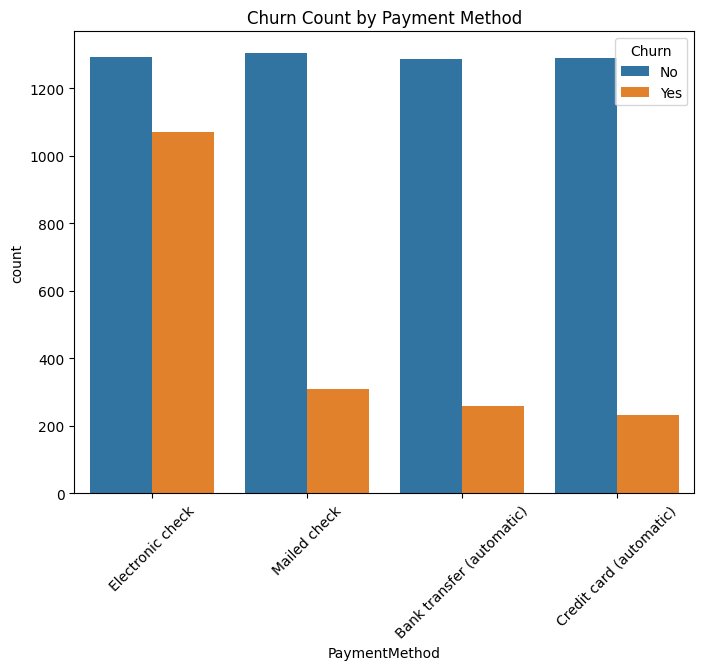

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067
Chi-Square Test p-value for PaymentMethod and Churn: 3.6823546520097993e-140


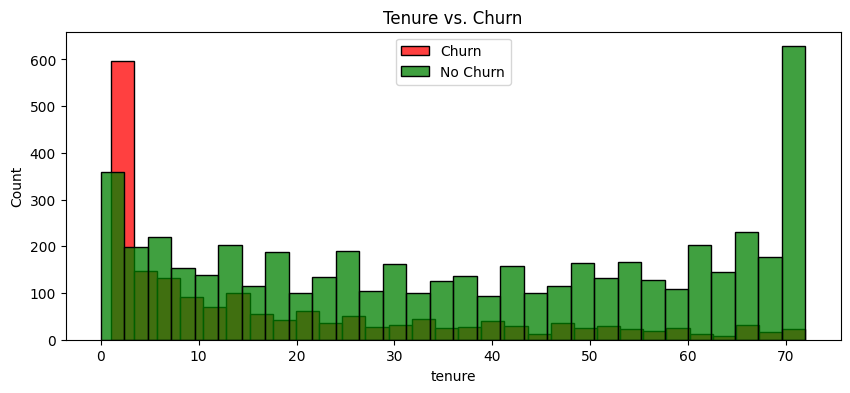

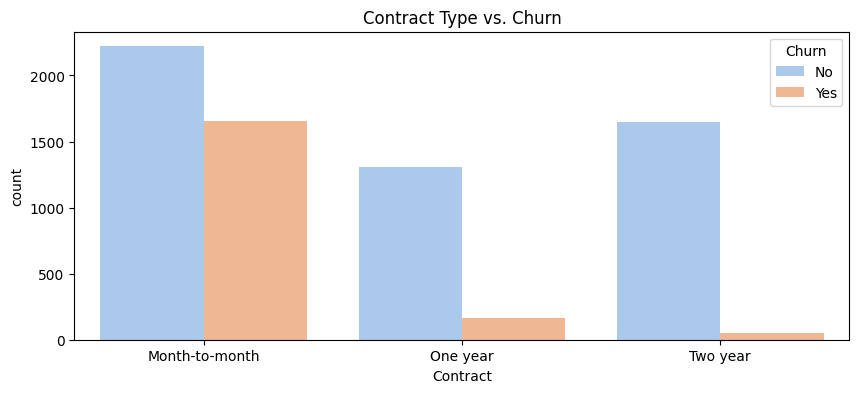

In [ ]:
# Identify Patterns and Potential Predictors of Churn


#choosed tenure, contract type, and payment method as strong indicators of churn because they are closely related to customer behavior and satisfaction.

# 1. Payment Method and Churn Analysis:

# Count plot for categorical feature 'PaymentMethod'
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn Count by Payment Method')
plt.xticks(rotation=45)
plt.show()

# Calculate churn rate for each payment method
churn_by_payment = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().fillna(0)
print(churn_by_payment)

# Chi-Square Test for 'PaymentMethod' and 'Churn'
contingency_table = pd.crosstab(df['PaymentMethod'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Test p-value for PaymentMethod and Churn: {p}')
#The analysis clearly shows that customers paying via electronic check are more likely to churn compared to those using other payment methods.

#---------------------------------------------------------------------------

# 2. Tenure vs. Churn
plt.figure(figsize=(10, 4))
sns.histplot(df[df['Churn'] == 'Yes']['tenure'], bins=30, color='red', label='Churn')
sns.histplot(df[df['Churn'] == 'No']['tenure'], bins=30, color='green', label='No Churn')
plt.legend()
plt.title('Tenure vs. Churn')
plt.show()
#Customers with shorter tenures appear to have a higher churn rate. The red distribution (churn) is more concentrated at the lower end of the tenure spectrum.

#---------------------------------------------------------------------------

# 3. Contract type vs. Churn
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')
plt.title('Contract Type vs. Churn')
plt.show()
#Customers with month-to-month contracts have a higher churn rate.